In [221]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Glaso correlation coefficients
coefficients = [0.989, 0.172, 1.2255, 2.8869, 14.1811, 3.3053, 0.5]
# Objective function (GOR estimation error)

#ACO parameters
alpha = 1
beta = 2
rho = 0.1
Q = 100
max_iterations = 1000

# Main program
if __name__ == '__main__':
    p = [2405, 2200, 1950, 1700, 1450, 1200, 950, 700, 450, 200]  # pressure
    API = 37  # API gravity
    T = 60  # temperature
    y = 0.743
    actual_GOR = [737,684,620,555,492,429,365,301,235,155] # actual GOR value

In [223]:
def objective_function(coefficients, p, API, T, y, actual_GOR):
    predicted_GOR = glaso_correlation(p, API, T, y, coefficients,)
    actual_gor = 737  # actual GOR values
    return np.sum((predicted_GOR - actual_GOR) ** 2)


In [227]:
k = math.log(p)
# Glaso correlation function
def glaso_correlation(p, API, T, y, coefficients):
    return y *((API**(coefficients[0]) / ((T + 460) - 460)**coefficients[1]) * 10**(coefficients[3] - (coefficients[4] - (coefficients[5]*k))**coefficients[6]))**coefficients[2]
    
                                                   
 

TypeError: must be real number, not list

In [213]:
# ACO algorithm
def aco_algorithm(p, API, T, y, actual_GOR):
    # Initialize pheromone trails and parameters
    tau = np.ones((len(coefficients), len(coefficients)))
    best_coefficients = coefficients
    best_error = float('inf')

    for _ in range(max_iterations):
        ants = np.random.uniform(0, 1, size=(Q, len(coefficients)))
        for ant in ants:
            error = objective_function(ant, p, API, T, y, actual_GOR)
            if error < best_error:
                best_error = error
                best_coefficients = ant
                tau += alpha * error * np.outer(ant, ant)
                tau *= (1 - rho)
                return best_coefficients

In [215]:
optimized_coefficients = aco_algorithm(p, API, T, y, actual_GOR)
predicted_GOR = glaso_correlation(p, API, T, y, optimized_coefficients)
    
print('Optimized coefficients:', optimized_coefficients)
print('Predicted GOR:', predicted_GOR)

Optimized coefficients: [0.44652421 0.50529334 0.01558325 0.67018887 0.47015199 0.04758678
 0.27646091]
Predicted GOR: 0.7414903345603719


C:\Users\CALEB\AppData\Local\Temp\ipykernel_8024\1246334889.py:4: RuntimeWarning: invalid value encountered in scalar power
  return y *((API**(coefficients[0]) / ((T + 460) - 460)**coefficients[1]) * 10**(coefficients[3] - (coefficients[4] - (coefficients[5]*k))**coefficients[6]))**coefficients[2]


C:\Users\CALEB\AppData\Local\Temp\ipykernel_8024\1246334889.py:4: RuntimeWarning: invalid value encountered in scalar power
  return y *((API**(coefficients[0]) / ((T + 460) - 460)**coefficients[1]) * 10**(coefficients[3] - (coefficients[4] - (coefficients[5]*k))**coefficients[6]))**coefficients[2]


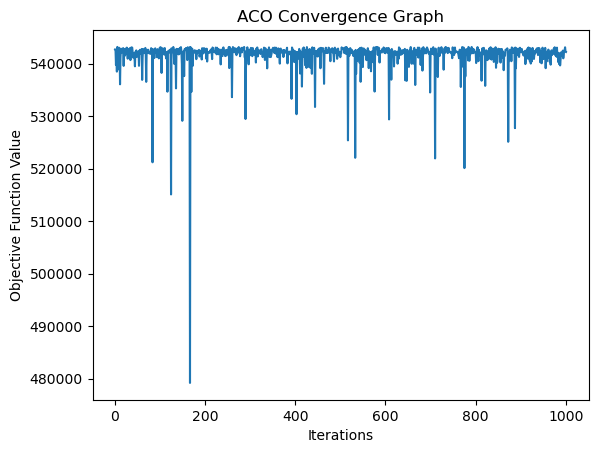

In [217]:
# Plot convergence graph
iterations = np.arange(1, max_iterations + 1)
objective_values = [objective_function(aco_algorithm(p, API, T, y, actual_GOR), p, API, T, y, actual_GOR) for _ in iterations]
plt.plot(iterations, objective_values)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('ACO Convergence Graph')
plt.show()



In [248]:
import numpy as np
import math
# Define the gamma_g function (the formula)
def calculate_gamma_g(API, T, P, alpha):
    """
    Calculate gamma_g using the provided formula.
    
    Parameters:
    API (float): API gravity of the oil
    T (float): Temperature in Rankine (°R)
    P (float): Pressure (psia or atm)
    alpha (list): List of the parameters [alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7]
    
    Returns:
    float: The calculated gas density gamma_g
    """
    alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7 = alpha
    
    # Compute the terms
    term1 = (API ** alpha_1) / ((T - 460) ** alpha_2)  # (API^alpha_1) / (T-460)^alpha_2
    term2 = alpha_4 - (alpha_5 - alpha_6 * math.log10(P)) ** alpha_7  # alpha_4 - (alpha_5 - alpha_6*log(P))**alpha_7
    
    # Combine the terms and raise to the power of alpha_3
    gamma_g = (term1 * 10 ** term2) ** alpha_3
    return gamma_g

In [250]:
# Objective function: Mean Squared Error (MSE)
def objective_function(alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7,  Pb_data, Tb_data, GOR_data):
    predicted_GOR = np.array([glaso_correlation(alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7,  Pb, Tb) for Pb, Tb in zip(Pb_data, Tb_data)])
    error = np.mean((predicted_GOR - GOR_data) ** 2)
    return error

In [263]:

# Ant Colony Optimization (ACO) for optimizing the coefficients a, b, and c
def aco_optimize(Pb_data, Tb_data, GOR_data, n_ants=20, n_iterations=100, alpha=1, beta=2, rho=0.1, Q=100):
    # Initialize pheromone levels (this can be a random or fixed starting point)
    pheromone_alpha_1 = np.ones(n_ants)  # Pheromones for a
    pheromone_alpha_2 = np.ones(n_ants)  # Pheromones for b
    pheromone_alpha_3 = np.ones(n_ants)  # Pheromones for c
    pheromone_alpha_4 = np.ones(n_ants)  # Pheromones for c
    pheromone_alpha_5 = np.ones(n_ants)  # Pheromones for c
    pheromone_alpha_6 = np.ones(n_ants)  # Pheromones for c
    pheromone_alpha_7 = np.ones(n_ants)  # Pheromones for c
    
    # Best solution found
    best_alpha_1, best_alpha_2, best_alpha_3, best_alpha_4, best_alpha_5, best_alpha_6, best_alpha_7, = 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0
    best_error = float('inf')
    
    # Iteration loop
    for iteration in range(n_iterations):
        # Solutions found by the ants
        solutions_alpha_1 = []
        solutions_alpha_2 = []
        solutions_alpha_3 = []
        solutions_alpha_4 = []
        solutions_alpha_5 = []
        solutions_alpha_6 = []
        solutions_alpha_7 = []       
        errors = []
        
        # Each ant searches for a solution
        for ant in range(n_ants):
            # Probability-based selection of coefficients using pheromones
            alpha_1 = np.random.uniform(0, 2) * pheromone_alpha_1[ant] ** alpha
            alpha_2 = np.random.uniform(0, 2) * pheromone_alpha_2[ant] ** beta
            alpha_3 = np.random.uniform(0, 2) * pheromone_alpha_3[ant] ** beta
            alpha_4 = np.random.uniform(0, 50) * pheromone_alpha_4[ant] ** beta
            alpha_5 = np.random.uniform(0, 50) * pheromone_alpha_5[ant] ** beta
            alpha_6 = np.random.uniform(0, 50) * pheromone_alpha_6[ant] ** beta
            alpha_7 = np.random.uniform(0, 2) * pheromone_alpha_7[ant] ** beta
            
            # Evaluate the solution using the objective function
            error = objective_function(alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7, Pb_data, Tb_data, GOR_data)
            
            # Store the solutions and their corresponding errors
            solutions_alpha_1.append(alpha_1)
            solutions_alpha_2.append(alpha_2)
            solutions_alpha_3.append(alpha_3)
            solutions_alpha_4.append(alpha_4)
            solutions_alpha_5.append(alpha_5)
            solutions_alpha_6.append(alpha_6)
            solutions_alpha_7.append(alpha_7)
            errors.append(error)
            
            # Update the best solution if a better one is found
            if error < best_error:
                best_error = error
                best_alpha_1, best_alpha_2, best_alpha_3, best_alpha_4, best_alpha_5, best_alpha_6, best_alpha_7, = alpha_1, alpha_2, alpha_3, alpha_4, alpha_5, alpha_6, alpha_7,
        
        # Update pheromones based on the ants' performance
        pheromone_alpha_1 *= (1 - rho)  # Decay the pheromones
        pheromone_alpha_2 *= (1 - rho)
        pheromone_alpha_3 *= (1 - rho)
        pheromone_alpha_4 *= (1 - rho)
        pheromone_alpha_5 *= (1 - rho)
        pheromone_alpha_6 *= (1 - rho)
        pheromone_alpha_7 *= (1 - rho)
        # Add new pheromones based on the solutions found
        for ant in range(n_ants):
            pheromone_alpha_1[ant] += Q / errors[ant]
            pheromone_alpha_2[ant] += Q / errors[ant]
            pheromone_alpha_3[ant] += Q / errors[ant]
            pheromone_alpha_4[ant] += Q / errors[ant]
            pheromone_alpha_5[ant] += Q / errors[ant]
            pheromone_alpha_6[ant] += Q / errors[ant]
            pheromone_alpha_7[ant] += Q / errors[ant]
        
        # Print the best solution found in this iteration
        print(f"Iteration {iteration + 1}, Best Error: {best_error}, alpha_1: {best_alpha_1}, alpha_2: {best_alpha_2}, alpha_3: {best_alpha_3}, alpha_4: {best_alpha_4}, alpha_5: {best_alpha_5}, alpha_6: {best_alpha_6}, alpha_7: {best_alpha_7}")
    
    return best_alpha_1, best_alpha_2, best_alpha_3, best_alpha_4, best_alpha_5, best_alpha_6, best_alpha_7, best_error

In [265]:
# Example data (Bubble point pressure, temperature, and observed GOR)
Pb_data = np.array([2405, 2200, 1950, 1700, 1450, 1200, 950, 700, 450, 200])  # Example pressures (psia)
Tb_data = np.array([520, 520, 520, 520, 520, 520, 520, 520, 520, 520,])      # Example temperatures (°R)
GOR_data = np.array([737,684,620,555,492,429,365,301,235,155])     # Example observed GOR values (scf/STB)

In [271]:
# Perform ACO optimization
best_alpha_1, best_alpha_2, best_alpha_3, best_alpha_4, best_alpha_5, best_alpha_6, best_alpha_7, best_error = aco_optimize(Pb_data, Tb_data, GOR_data)

print(f"Optimized coefficients: alpha_1 = {best_aLpha_1},  alpha_2 = {best_aLpha_1}, alpha_2 = {best_alpha_2}, alpha_3 = {best_alpha_3}, alpha_4 = {best_alpha_4}, alpha_5 = {best_alpha_5}, alpha_6 = {best_alpha_6}, alpha_7 = {best_alpha_7}")
print(f"Best error: {best_error}")

NameError: name 'a' is not defined